In [1]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg
import spacy, nltk
from konlpy.tag import Okt

c:\Users\admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_lfw_people

In [81]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [6]:
cancer = load_breast_cancer(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [7]:
# test set의 전처리도 train set의 scaler를 가져가야 → 같은 변환을 적용해야
scaler = MinMaxScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [9]:
svm_clf = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train_sc, y_train)
svm_clf.score(X_train_sc, y_train), svm_clf.score(X_test_sc, y_test), svm_clf.predict(X_test_sc)

(0.9835680751173709,
 0.965034965034965,
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]))

In [12]:
# SimpleImputer 및 KNNImputer

In [13]:
cancer = load_breast_cancer(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

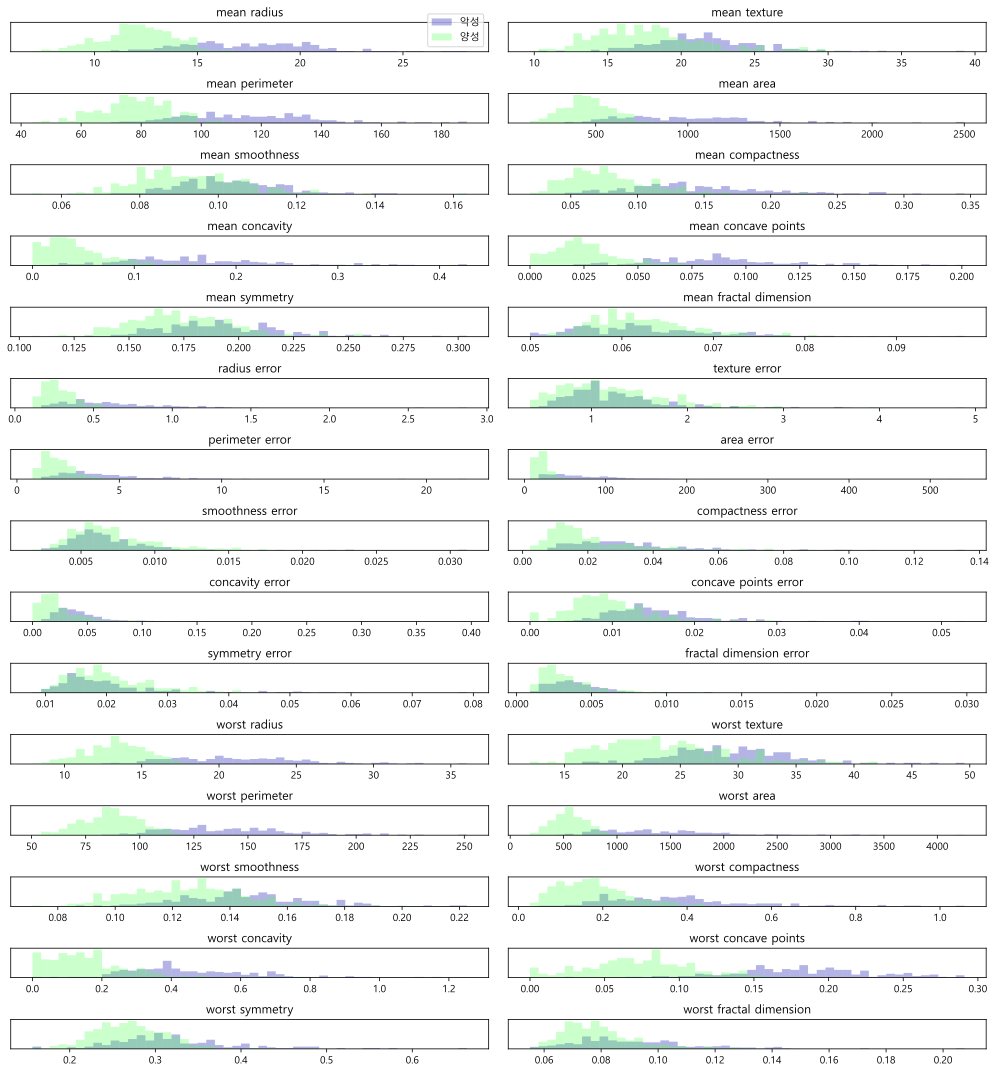

In [22]:
fig, axs = plt.subplots(15, 2, figsize=(14, 15))
malignant = cancer['data'][cancer['target'] == 0]
benign = cancer['data'][cancer['target'] == 1]
ax = axs.ravel()
for i in range(30):
    _, bins = np.histogram(cancer['data'].iloc[:, i], bins=50)
    ax[i].hist(malignant.iloc[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.3)
    ax[i].hist(benign.iloc[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.3)
    ax[i].set_title(cancer['feature_names'][i])
    ax[i].set_yticks(())
ax[0].legend(['악성', '양성'])
fig.tight_layout()

In [26]:
scaler = StandardScaler().fit(cancer['data'])
X_sc = scaler.transform(cancer['data'])

In [27]:
pca = PCA(n_components=2).fit(X_sc)
X_pca = pca.transform(X_sc)
X_sc.shape, X_pca.shape

((569, 30), (569, 2))

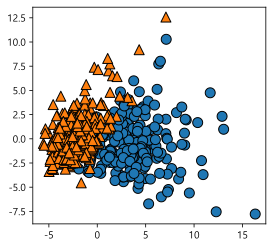

In [30]:
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer['target'])
plt.gca().set_aspect('equal')
plt.show()

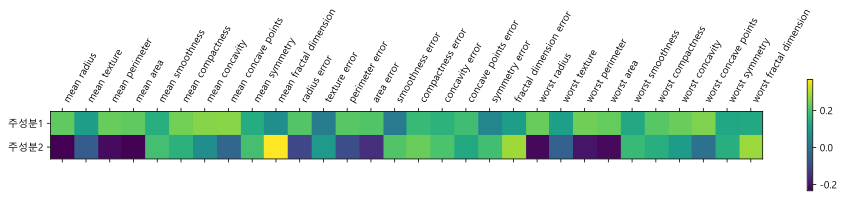

In [40]:
pca.components_
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['주성분1', '주성분2'])
plt.colorbar()
plt.xticks(range(len(cancer['feature_names'])), cancer['feature_names'], rotation=60, ha='left')
plt.show()

In [47]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people['images'][0].shape
image_shape, len(people['target_names']), people['images'].shape

((87, 65), 62, (3023, 87, 65))

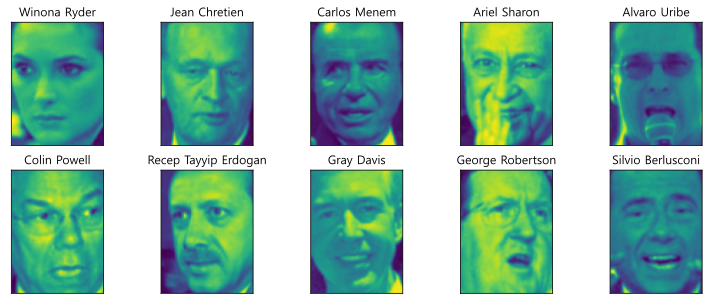

In [45]:
fig, axs = plt.subplots(2, 5, figsize=(13, 5), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people['target'], people['images'], axs.ravel()):
    ax.imshow(image)
    ax.set_title(people['target_names'][target])

In [53]:
counts = np.bincount(people['target'])
for i, (count, name) in enumerate(zip(counts, people['target_names'])):
    print(f'{name:25} {count:3}', end='\t')
    if (i + 1) % 4 == 0:
        print()

Alejandro Toledo           39	Alvaro Uribe               35	Amelie Mauresmo            21	Andre Agassi               36	
Angelina Jolie             20	Ariel Sharon               77	Arnold Schwarzenegger      42	Atal Bihari Vajpayee       24	
Bill Clinton               29	Carlos Menem               21	Colin Powell              236	David Beckham              31	
Donald Rumsfeld           121	George Robertson           22	George W Bush             530	Gerhard Schroeder         109	
Gloria Macapagal Arroyo    44	Gray Davis                 26	Guillermo Coria            30	Hamid Karzai               22	
Hans Blix                  39	Hugo Chavez                71	Igor Ivanov                20	Jack Straw                 28	
Jacques Chirac             52	Jean Chretien              55	Jennifer Aniston           21	Jennifer Capriati          42	
Jennifer Lopez             21	Jeremy Greenstock          24	Jiang Zemin                20	John Ashcroft              53	
John Negroponte            31	Jo

In [78]:
mask = np.zeros(people['target'].shape, dtype='bool')
for target in np.unique(people['target']):
    mask[np.where(people['target'] == target)[0][:50]] = 1
X_people = people['data'][mask]
X_people = X_people / 255
y_people = people['target'][mask]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state=0)

In [80]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [83]:
knn_clf = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, y_train)
knn_clf.score(X_test_pca, y_test)

0.32751937984496127

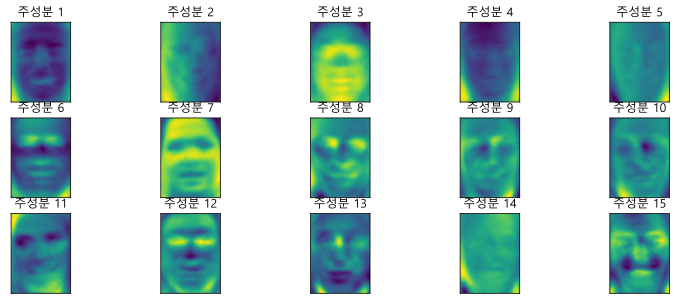

In [91]:
fig, axs = plt.subplots(3, 5, figsize=(13, 5), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axs.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title(f'주성분 {i + 1}')